In [ ]:
#Synchronous machine dataset
#dataset obtained in http://archive.ics.uci.edu/ml/datasets/Synchronous+Machine+Data+Set

#Citation Request:
#1) Kahraman, H. T. (2014). Metaheuristic linear modeling technique for estimating the excitation current of a synchronous motor.Â Turkish Journal of Electrical Engineering & Computer Sciences,Â 22(6), 1637-1652.
#2) Kahraman, H. T., Bayindir, R, & Sagiroglu, S. (2012). A new approach to predict the excitation current and parameter weightings of synchronous machines based on genetic algorithm-based k-NN estimator.Â Energy Conversion and Management,Â 64, 129-138.

In [ ]:
#Iy (Load Current)
#PF (Power factor)
#e (Power factor error)
#dIf (Changing of excitation current of synchronous machine)
#If (Excitation current of synchronous machine)

#the objective of this dataset is to estimate If of a SM.

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [210]:
from  sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [211]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [228]:
df = pd.read_csv("e:/data/synchronous-machine.csv",sep=';',decimal = ',')

In [229]:
df.head()

,Iy,PF,e,dIf,If
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


In [230]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Iy      557 non-null    float64
 1   PF      557 non-null    float64
 2   e       557 non-null    float64
 3   dIf     557 non-null    float64
 4   If      557 non-null    float64
dtypes: float64(5)
memory usage: 21.9 KB
None
               Iy          PF           e         dIf          If
count  557.000000  557.000000  557.000000  557.000000  557.000000
mean     4.499820    0.825296    0.174704    0.350659    1.530659
std      0.896024    0.103925    0.103925    0.180566    0.180566
min      3.000000    0.650000    0.000000    0.037000    1.217000
25%      3.700000    0.740000    0.080000    0.189000    1.369000
50%      4.500000    0.820000    0.180000    0.345000    1.525000
75%      5.300000    0.920000    0.260000    0.486000    1.666000
max      6.000000    1.000000    0.350000    0.769000    1.9490

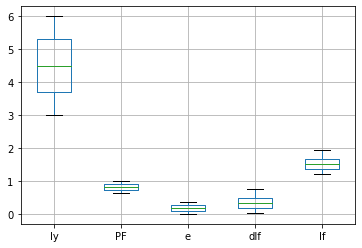

In [231]:
boxplot = df.boxplot(column=['Iy', 'PF', 'e', 'dIf', 'If'])

In [232]:
df.head()

,Iy,PF,e,dIf,If
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


In [233]:
corr_matrix = df.corr()
print(corr_matrix['If'].sort_values(ascending=False))

If     1.000000
dIf    1.000000
e      0.861013
Iy     0.424945
PF    -0.861013
Name: If, dtype: float64


In [234]:
#Prevent target leakage
df.drop('dIf', axis = 1, inplace = True)

In [235]:
y = df['If']
X = df.copy()
X.drop('If',axis = 'columns', inplace = True)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle= True)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

>LR 0.852 (0.042)
>RF 0.989 (0.004)
>KNN 0.953 (0.011)
>Mean -0.012 (0.014)


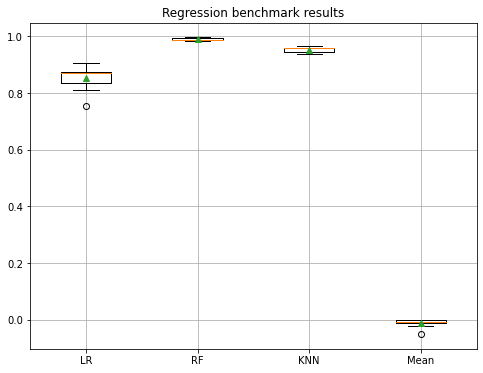

In [240]:
# evaluate a model
def evaluate_model(X_train, y_train, model):
    # define evaluation procedure
    cv = KFold(n_splits=10, random_state=5, shuffle = True)
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    # Linear Regression
    models.append(LinearRegression())
    names.append('LR')
    # Randon forest regressor
    models.append(RandomForestRegressor(n_estimators=100))
    names.append('RF')
    # KNN
    models.append(KNeighborsRegressor())
    names.append('KNN')
    # Dummy s mean
    models.append(DummyRegressor(strategy='mean'))
    names.append('Mean')
    
    return models, names

# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model(X_train, y_train, models[i])
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# plot the results
plt.figure(figsize= (8,6))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Regression benchmark results')
plt.grid()
plt.show()

Mean squared error: 0.000
Coefficient of determination: 0.99


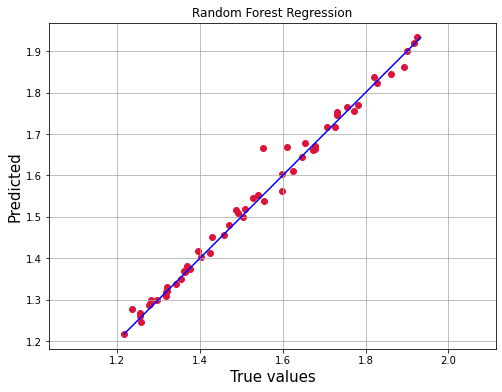

In [239]:
# Create Random Forest regression object
RF =  RandomForestRegressor(n_estimators=2)

# Train the model using the training sets
RF.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = RF.predict(X_test)

# The mean squared error
print('Mean squared error: {:.3f}'.format(mean_squared_error(y_test,y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))

# Plot outputs
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.grid()
plt.title('Random Forest Regression')
plt.show()